Super short notebook. Minimal impl of the paper `Adaptive Local Thresholding for Detection of Nuclei in Diversely Stained Cytology Images`


### Wut

Accurate cell nucleus segmentation is necessary for automated cytological image analysis. Thresholding is a crucial step in segmentation. The accuracy of segmentation depends on the accuracy of thresholding.

Paper proposes a method for thresholding of photomicrographs of diversly stained cytology smears. To account for the different stains it uses different color spaces. A local thresholding scheme is developed to solve the problem of nonuniform staining.


In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
image_path = "cytology.jpeg"

In [3]:
def preprocess_image(image_path):
    img_rgb = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
    l, a, b = cv2.split(img_lab)
    img_lab_ed = np.sqrt(np.square(l) + np.square(a) + np.square(b))

    return img_gray, img_lab_ed

In [4]:
def adaptive_local_thresholding(img, window_size=15, k=0.25, p=3, q=10):
    img_float = img.astype(np.float32) / 255.0
    mean = cv2.blur(img_float, (window_size, window_size))
    mean_sq = cv2.blur(np.square(img_float), (window_size, window_size))
    variance = mean_sq - np.square(mean)
    stddev = np.sqrt(variance)

    R = 0.5
    threshold = mean * (1 + p * np.exp(-q * mean) + k * ((stddev / R) - 1))

    return (img_float > threshold).astype(np.uint8) * 255

In [5]:
def combine_results(img_gray_thres, img_lab_thres):
    return cv2.bitwise_or(img_gray_thres, img_lab_thres)

In [7]:
def compare_methods(img_gray, img_lab_ed):
    _, global_thresh_otsu = cv2.threshold(
        img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    adaptive_thresh = cv2.adaptiveThreshold(
        img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    plt.figure(figsize=(12, 8))
    plt.subplot(131), plt.imshow(global_thresh_otsu, cmap="gray")
    plt.title("Otsu Thresholding"), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(adaptive_thresh, cmap="gray")
    plt.title("Adaptive Gaussian Thresholding"), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img_lab_ed, cmap="gray")
    plt.title("L*a*b* Euclidean Distance"), plt.xticks([]), plt.yticks([])

    plt.show()

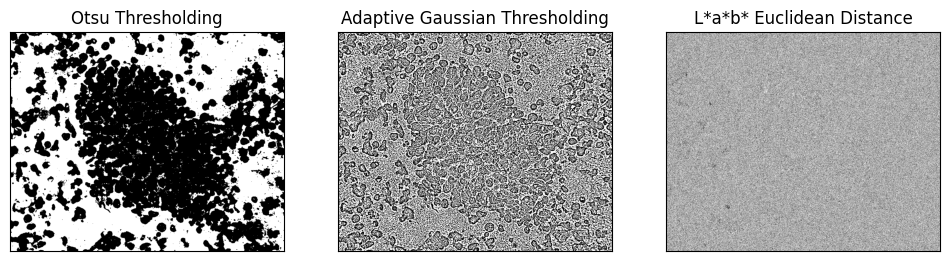

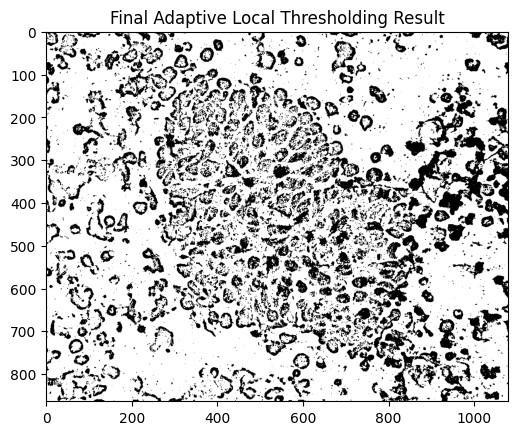

In [8]:
img_gray, img_lab_ed = preprocess_image(image_path)
img_gray_thres = adaptive_local_thresholding(img_gray)
img_lab_thres = adaptive_local_thresholding(img_lab_ed)

final_result = combine_results(img_gray_thres, img_lab_thres)
compare_methods(img_gray, img_lab_ed)

plt.imshow(final_result, cmap="gray")
plt.title("Final Adaptive Local Thresholding Result")
plt.show()